In [35]:
import numpy as np
import os
data_root = "./data/AMASS/HumanEva/HumanEva/hps/"
file_name = "hps_track_0.npy"
data_path = os.path.join(data_root,file_name)
#entry_data = dict(np.load(open(data_path, "rb"), allow_pickle=True))

data = np.load(data_path, allow_pickle=True)


FileNotFoundError: [Errno 2] No such file or directory: './data/AMASS/HumanEva/HumanEva/hps/hps_track_0.npy'

dict_keys(['pose_aa', 'gender', 'trans', 'betas', 'fps'])
(672, 10)


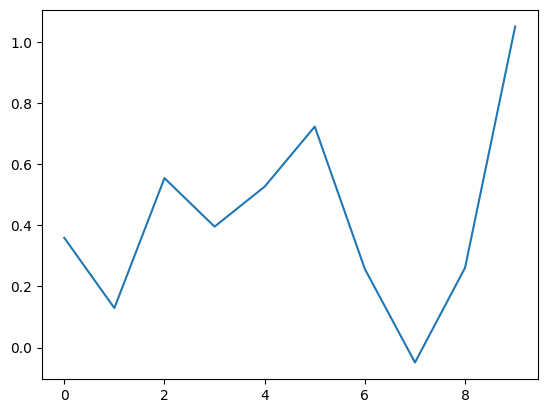

In [29]:
def load_amass_data(data_path):
    entry_data = dict(np.load(open(data_path, "rb"), allow_pickle=True))

    if not 'mocap_framerate' in  entry_data:
        return 
    framerate = entry_data['mocap_framerate'] 


    root_trans = entry_data['trans']
    pose_aa = np.concatenate([entry_data['poses'][:, :66], np.zeros((root_trans.shape[0], 6))], axis = -1)
    betas = entry_data['betas']
    gender = entry_data['gender']   
    N = pose_aa.shape[0]
    return {
        "pose_aa": pose_aa,
        "gender": gender,
        "trans": root_trans,
        "betas": betas,
        "fps": framerate
    }


import numpy as np
import os
data_root = "./data/AMASS/HumanEva/HumanEva/S5/"
file_name = "hps_track_last_0.npz"
data_path = os.path.join(data_root,file_name)
#entry_data = dict(np.load(open(data_path, "rb"), allow_pickle=True))
data = load_amass_data(data_path)
print(data.keys())
print(data["betas"].shape)
import matplotlib.pyplot as plt; plt.plot(data["betas"].mean(axis=0))

In [13]:
data["pose_aa"].shape

(672, 72)

(16,)


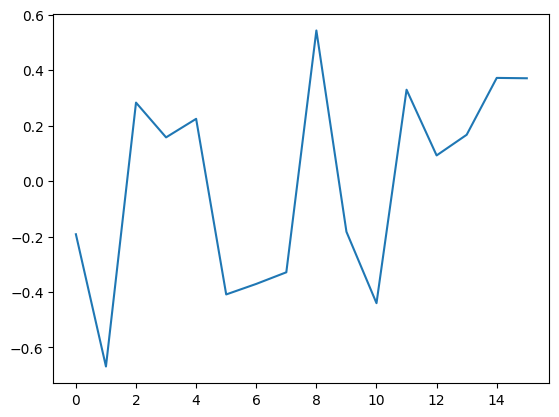

In [30]:
import numpy as np
import os
data_root = "./data/AMASS/HumanEva/HumanEva/S3/"
file_name = "Walking_3_poses.npz"
data_path = os.path.join(data_root,file_name)
#entry_data = dict(np.load(open(data_path, "rb"), allow_pickle=True))
data = load_amass_data(data_path)
print(data["betas"].shape)
plt.plot(data["betas"])

In [31]:
from smpl_sim.smpllib.smpl_joint_names import SMPL_MUJOCO_NAMES, SMPL_BONE_ORDER_NAMES, SMPLH_BONE_ORDER_NAMES
print(SMPL_BONE_ORDER_NAMES)

['Pelvis', 'L_Hip', 'R_Hip', 'Torso', 'L_Knee', 'R_Knee', 'Spine', 'L_Ankle', 'R_Ankle', 'Chest', 'L_Toe', 'R_Toe', 'Neck', 'L_Thorax', 'R_Thorax', 'Head', 'L_Shoulder', 'R_Shoulder', 'L_Elbow', 'R_Elbow', 'L_Wrist', 'R_Wrist', 'L_Hand', 'R_Hand']


In [ ]:
root pos: [0.05825257 0.96143683 1.04290087], pre root pos: [0.09904466 0.96538814 1.04522676], root lin vel: [-1.22376278 -0.11853933 -0.06977677]


In [34]:
(0.05825257 - 0.09904466)/0.033

-1.2361239393939396